### Bank Marketing Analysis with Classification Modeling:

### Data Description:
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#### Impoting the basic Libraries for reading , manipulating and visualize the data:

In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

### Data Preprocessing:

### 1)  Understanding the data :

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
### checking the duplicate records:

In [7]:
df.duplicated().sum()

0

In [8]:
### checking for missing values:

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
### Here we don't find any missing values.

### we can explore the numrical and categorical features.

In [11]:
df.day.value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

In [12]:
### This must be converted to categorical variable in the feature engineering part.

In [13]:
df.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [14]:
## -1 indicates that the person was not contacted before 

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [16]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [17]:
jobs = list(df['job'].unique())

In [18]:
for job in jobs:
    print(job + ' \t: ' + str(len(df[(df['deposit']=='yes')  & (df['job']==job)])))

admin. 	: 631
technician 	: 840
services 	: 369
management 	: 1301
retired 	: 516
blue-collar 	: 708
unemployed 	: 202
entrepreneur 	: 123
housemaid 	: 109
unknown 	: 34
self-employed 	: 187
student 	: 269


In [19]:
## large number of people from management side has subscribed to a term deposit when compared to other category

In [20]:
df.groupby(['deposit','marital']).size()

deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64

In [21]:
## out of 6351 married people only 56.6% have shown interest in deposit.

In [22]:
df.groupby(['deposit','education']).size()

deposit  education
no       primary       909
         secondary    3026
         tertiary     1693
         unknown       245
yes      primary       591
         secondary    2450
         tertiary     1996
         unknown       252
dtype: int64

In [23]:
df.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [24]:
df.groupby(['deposit','housing']).size()

deposit  housing
no       no         2527
         yes        3346
yes      no         3354
         yes        1935
dtype: int64

### EXPLORATORY DATA ANALYSIS:

In [25]:
categorical_features = list(df.select_dtypes(include='object').columns)

In [26]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

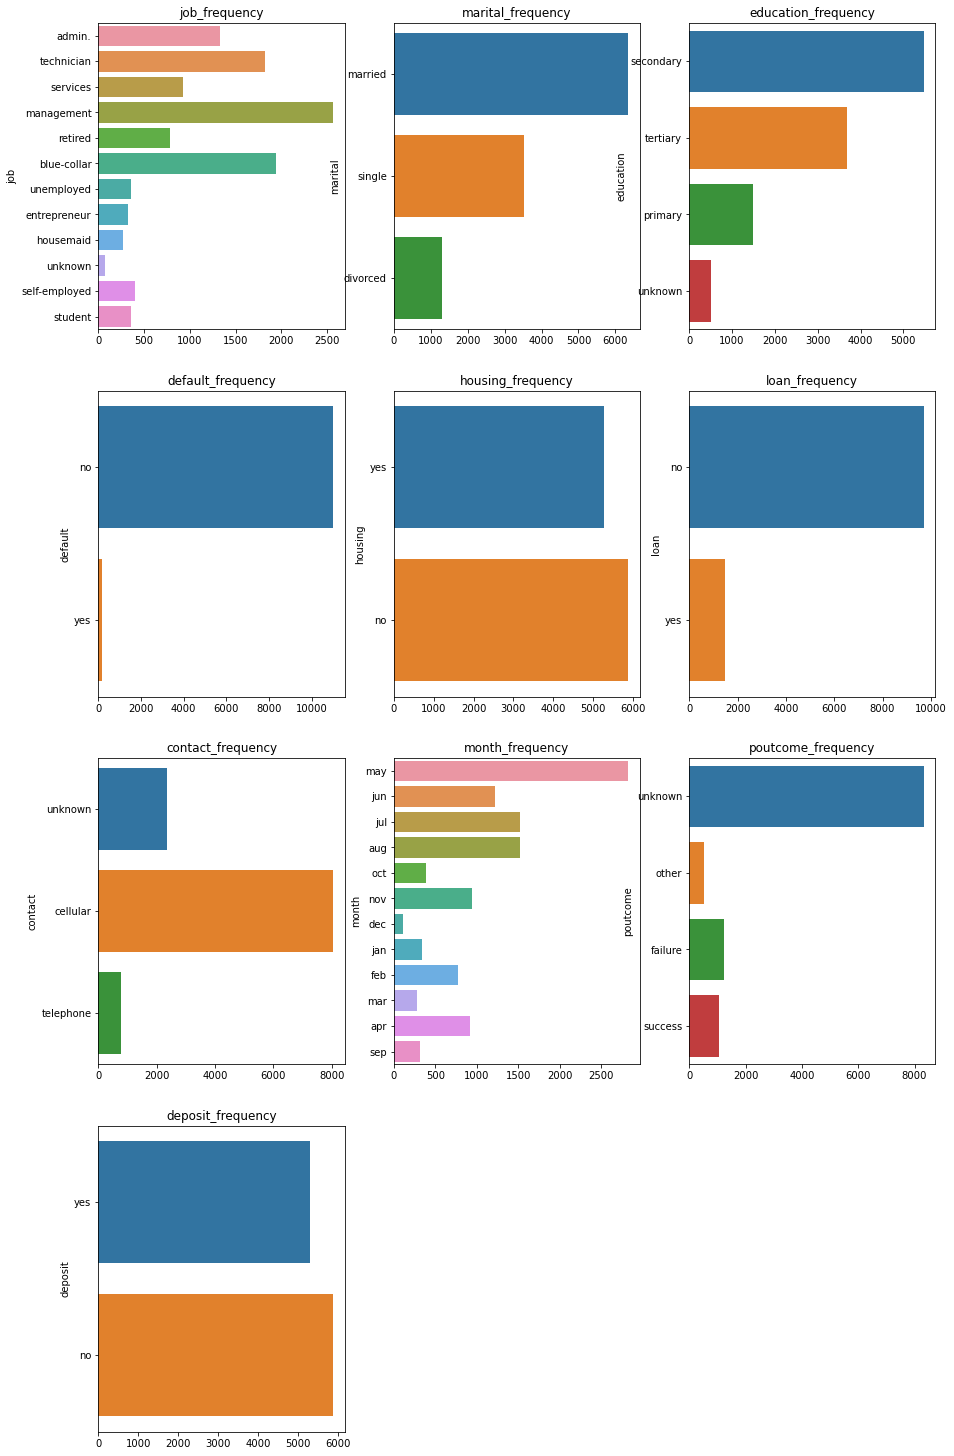

In [27]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel('')
    plt.title(categorical_feature+'_frequency')
    plotnumber+=1
plt.show()

In [28]:
## The frequency of management , blue_collar , technician is very high.
## These 3 categories can be given the first preference for marketing the deposit plans.

In [29]:
## Married people are in high counts followed by single and divorced

In [30]:
## people with secodary education are in high frequency when compared to tertiary and primary education

In [31]:
## There are very  very less no of defaulters in this dataset

In [32]:
## The housing seems to be approximately similar for both 'yes' and 'no'

In [33]:
## Majority of the people does not have loan.

In [34]:
## Majority of the people is contacted by the cellular mode

In [35]:
## People are contacted mostly in the month of May

In [36]:
## The outcome of previous campaign is mostly unknown

In [37]:
## The output variable 'Deposit' is completely balanced

### Univariate Analysis:

### Distribution plot of Continous Numerical Features

In [38]:
numerical_features = df[['age','balance','duration','campaign','pdays','previous']]

In [39]:
numerical_features.head()

,age,balance,duration,campaign,pdays,previous
0,59,2343,1042,1,-1,0
1,56,45,1467,1,-1,0
2,41,1270,1389,1,-1,0
3,55,2476,579,1,-1,0
4,54,184,673,2,-1,0


In [40]:
## Distribution plot for people who have deposited

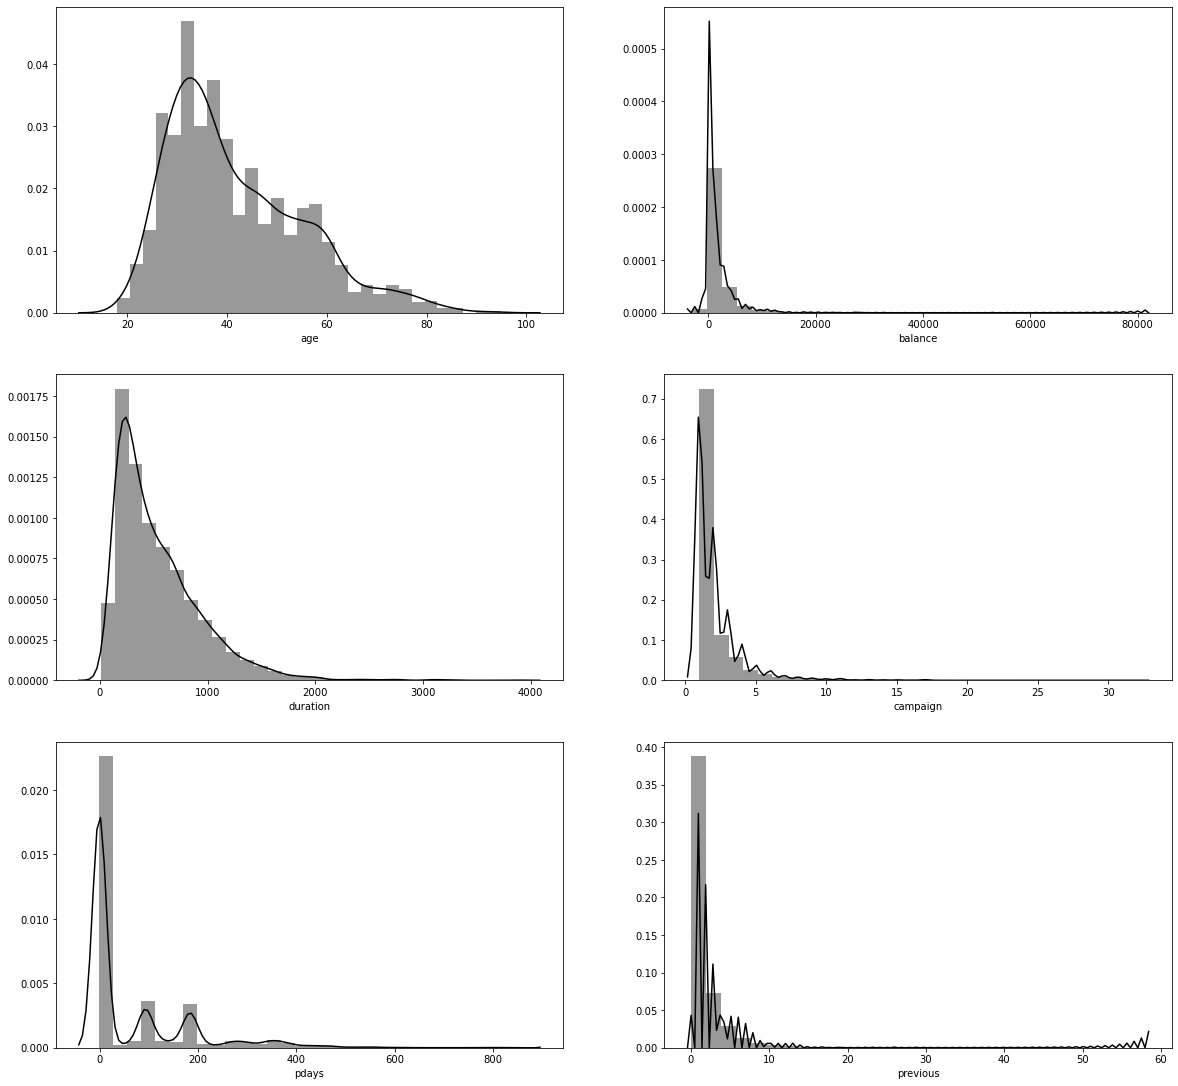

In [41]:
plt.figure(figsize=(20,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.distplot(df[(df['deposit']=='yes')][numerical_feature] , bins =30 , label = 'Yes' , color = 'black' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [42]:
## Distribution plot for people who have  not deposited

C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


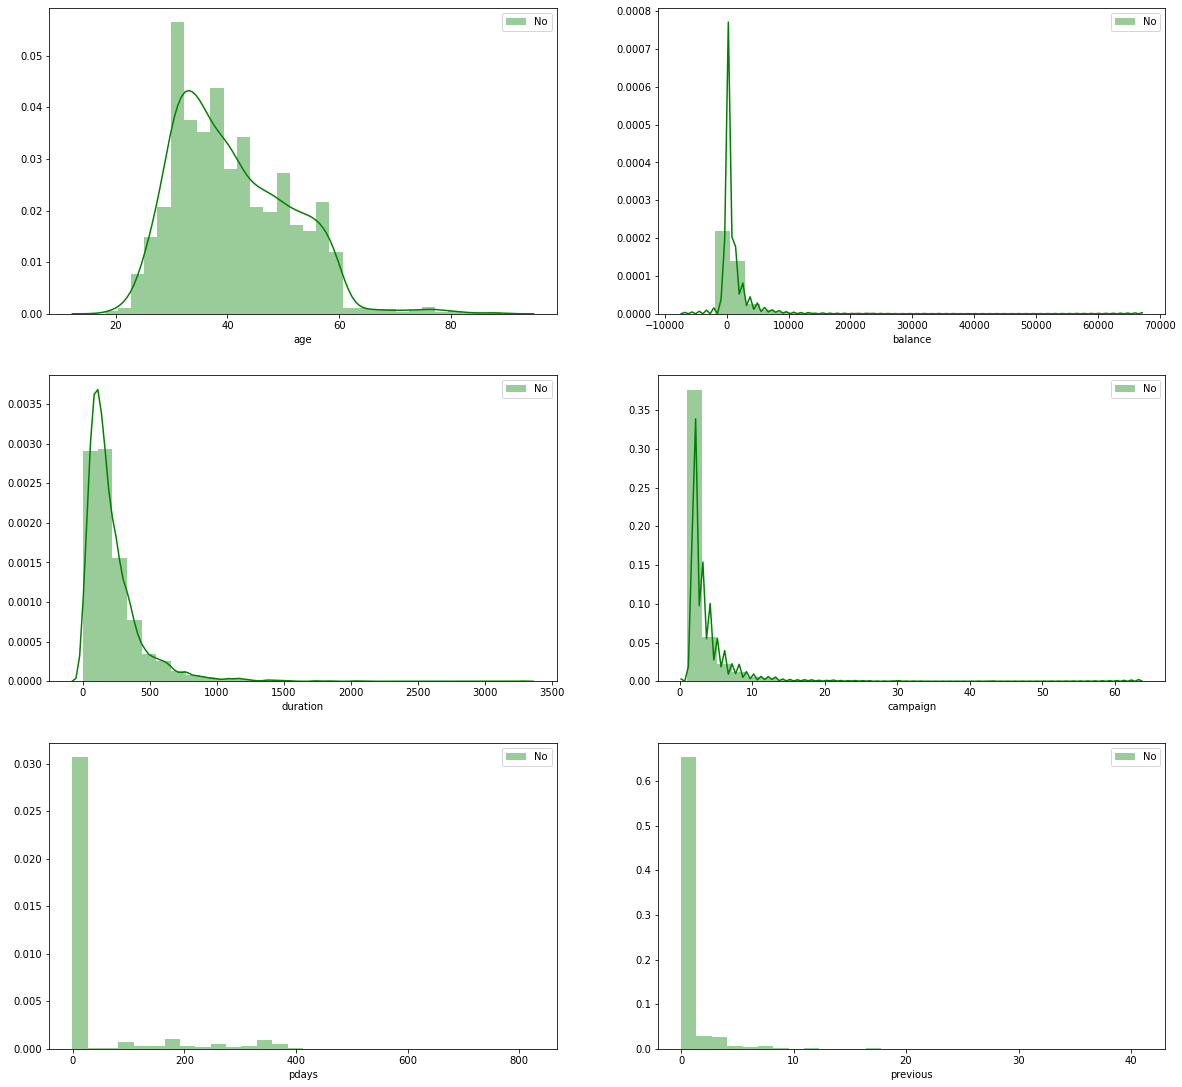

In [43]:
plt.figure(figsize=(20,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.distplot(df[(df['deposit']=='no')][numerical_feature] , bins =30 , label = 'No',color = 'green')
    plt.legend(loc = 'upper right')
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()
 

In [44]:
## Distribution plot for people who have deposited and not deposited

C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


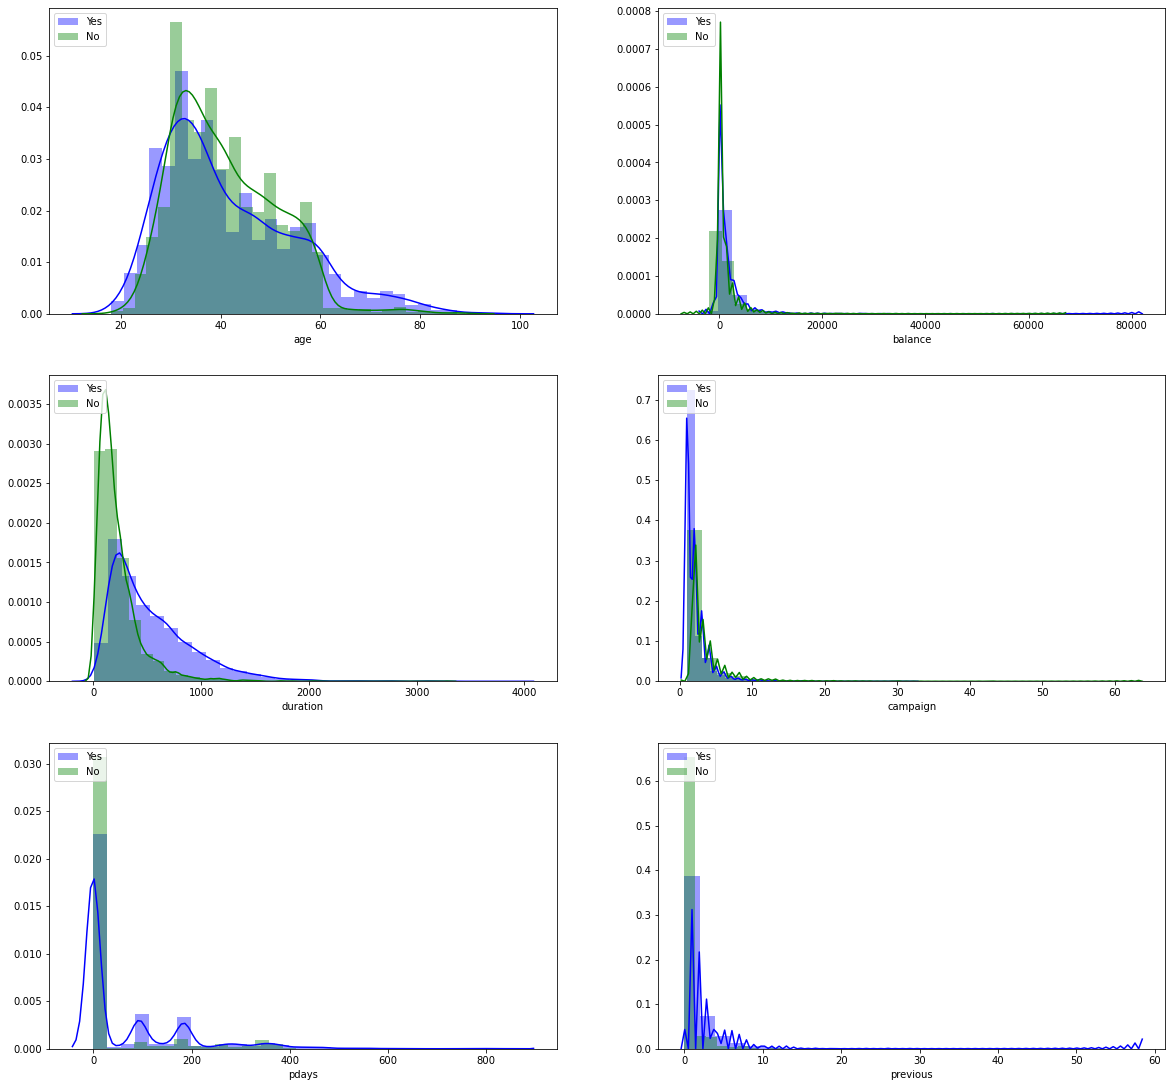

In [45]:
plt.figure(figsize=(20,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.distplot(df[(df['deposit']=='yes')][numerical_feature] , bins =30 , label = 'Yes',color='blue')
    sns.distplot(df[(df['deposit']=='no')][numerical_feature] , bins =30 , label = 'No',color = 'green')
    plt.legend(loc='upper left')
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [46]:
# Most of the features are skewed and has outliers.
# These features can be scaled to have a normal distribution.

### Multivariate Analysis:

In [47]:
## pair plot:

In [48]:
num_features = numerical_features.copy()

In [49]:
num_features['deposit'] = df['deposit']

C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sathi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


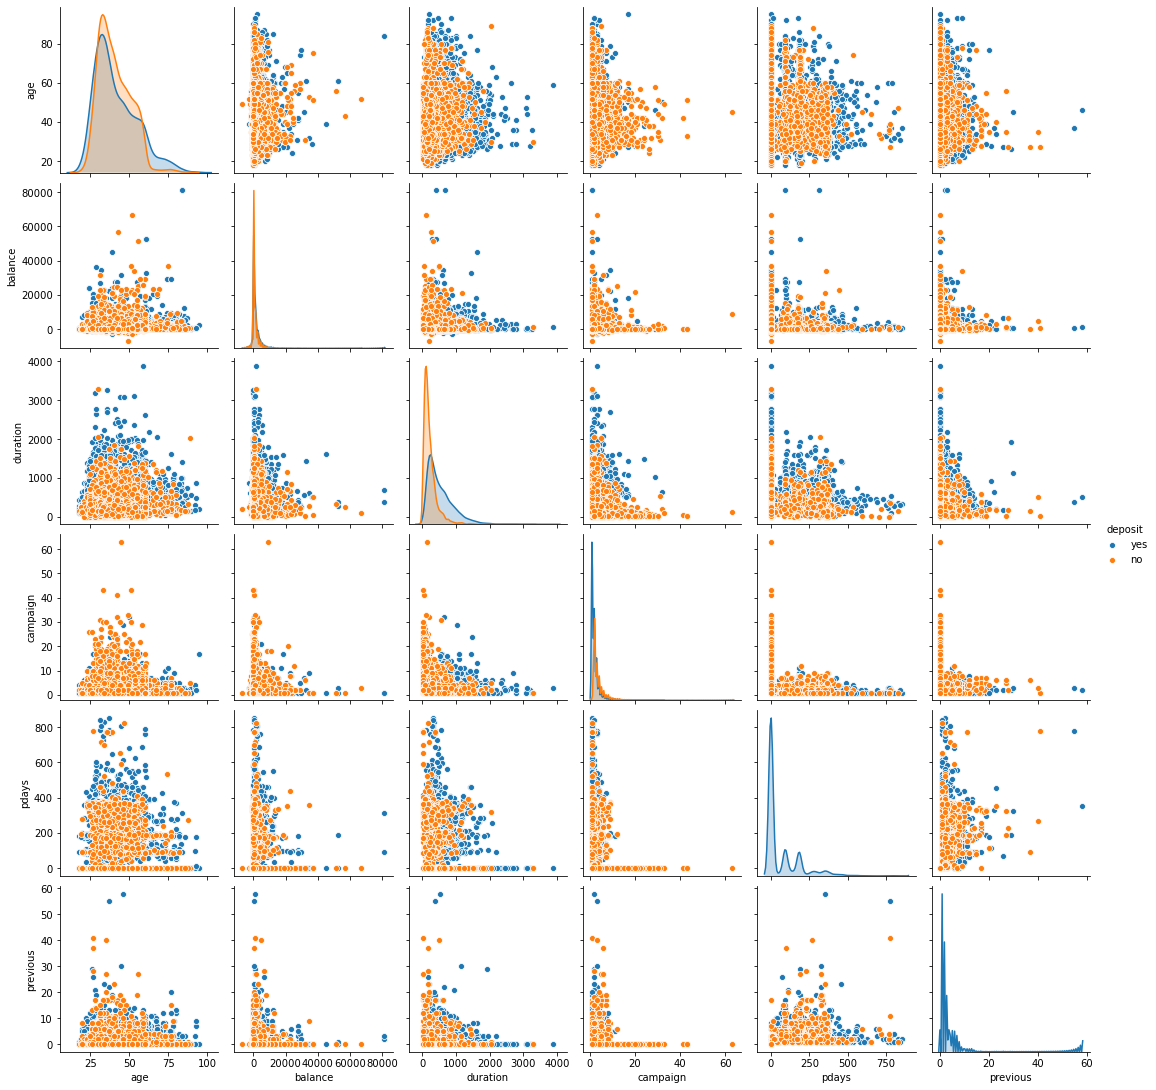

In [50]:
sns.pairplot(num_features,hue='deposit')
plt.show()

### Correlation Plot:

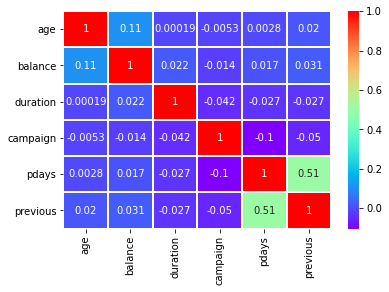

In [51]:
sns.heatmap(numerical_features.corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)
plt.show()

In [52]:
## pdays and previous variables are having moderate correlation.

### Pie chart

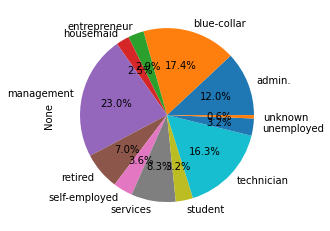

In [53]:
df.groupby('job').size().plot(kind='pie', autopct='%.1f%%')

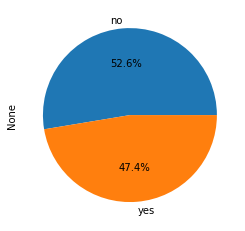

In [54]:
df.groupby('deposit').size().plot(kind='pie', autopct='%.1f%%')

In [55]:
## 74% of the person have not contacted so we can drop this column

In [56]:
## campaign and previous does not add much value to the dependent variable so we can drop

In [57]:
df = df.drop(['pdays','campaign','previous'] , axis = 1)

In [58]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes


### Feature Engineering:

In [59]:
# conerting days into 3 categories:

In [60]:
temp_day = []
for i in df['day']:
    if i<=7:
        temp_day.append("1st_week")
    elif i>23:
        temp_day.append("last_week")
    else:
        temp_day.append("mid_weeks")

df['day'] = temp_day

In [61]:
df.day.value_counts()

mid_weeks    6394
1st_week     2470
last_week    2298
Name: day, dtype: int64

In [62]:
df['day'] = df['day'].astype('object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  object
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.2+ MB


### One Hot Encoding:

In [64]:
cat_df = df.drop(['age','balance','duration','deposit'] , axis  = 1)

In [65]:
cat_df = pd.get_dummies(cat_df ,drop_first = True )

In [66]:
cat_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
num_df = df[['age','balance','duration']]

In [68]:
num_df.head()

,age,balance,duration
0,59,2343,1042
1,56,45,1467
2,41,1270,1389
3,55,2476,579
4,54,184,673


In [69]:
from sklearn.preprocessing import StandardScaler 

In [70]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(num_df) , columns = num_df.columns)

In [71]:
scaled_df

,age,balance,duration
0,1.491505,0.252525,1.930226
1,1.239676,-0.459974,3.154612
2,-0.019470,-0.080160,2.929901
3,1.155733,0.293762,0.596366
4,1.071790,-0.416876,0.867171
...,...,...,...
11157,-0.691015,-0.473616,-0.331287
11158,-0.187357,-0.246658,-0.832564
11159,-0.774958,-0.464934,-0.622258
11160,0.148416,-0.473926,-1.045752


(array([8.673e+03, 2.296e+03, 1.360e+02, 3.700e+01, 1.200e+01, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([-2.59684973,  0.13318625,  2.86322224,  5.59325823,  8.32329421,
        11.0533302 , 13.78336618, 16.51340217, 19.24343816, 21.97347414,
        24.70351013]),
 <a list of 10 Patch objects>)

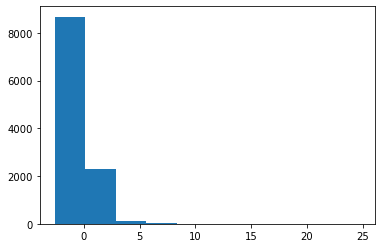

In [72]:
plt.hist(scaled_df['balance'])

(array([ 450., 2994., 3050., 1762., 1599.,  882.,  179.,  174.,   62.,
          10.]),
 array([-1.95016104, -1.30379939, -0.65743774, -0.01107609,  0.63528555,
         1.2816472 ,  1.92800885,  2.5743705 ,  3.22073215,  3.86709379,
         4.51345544]),
 <a list of 10 Patch objects>)

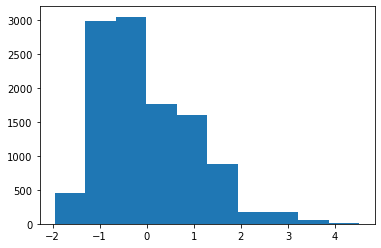

In [73]:
plt.hist(scaled_df['age'])

(array([7.500e+03, 2.355e+03, 8.880e+02, 2.930e+02, 8.400e+01, 2.300e+01,
        9.000e+00, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([-1.065918  ,  0.05158605,  1.16909011,  2.28659416,  3.40409821,
         4.52160226,  5.63910631,  6.75661036,  7.87411441,  8.99161846,
        10.10912251]),
 <a list of 10 Patch objects>)

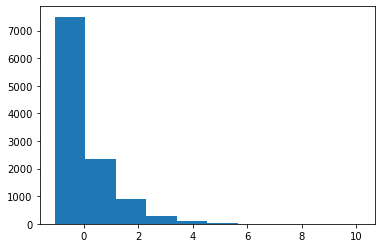

In [74]:
plt.hist(scaled_df['duration'])

### Feature Selection

In [76]:
### since our target variable is categorical so we can use chi2(categorical) and mutual information test(numerical)

### chi2 test

In [77]:
y = df['deposit']

In [79]:
from sklearn.feature_selection import chi2
f_p_values = chi2(cat_df,y)

In [80]:
## good features should have high f value and very less p value(<0.05)

p_values = pd.Series(f_p_values[1])
p_values.index = cat_df.columns
p_values.nsmallest(15)

poutcome_success      2.528999e-182
contact_unknown       8.441765e-128
housing_yes            4.160223e-55
month_may              1.174350e-54
month_mar              2.446118e-45
month_oct              7.937076e-44
month_sep              7.263867e-40
poutcome_unknown       1.257778e-34
loan_yes               1.258623e-27
job_retired            3.682256e-26
job_student            2.801241e-25
job_blue-collar        3.606829e-22
month_dec              6.106680e-20
marital_single         1.298745e-16
education_tertiary     2.893111e-16
dtype: float64

In [81]:
from sklearn.feature_selection import SelectKBest
features = SelectKBest(score_func = chi2 , k=20)
ordered_feature=features.fit(cat_df,y)

In [82]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfscores.index = cat_df.columns

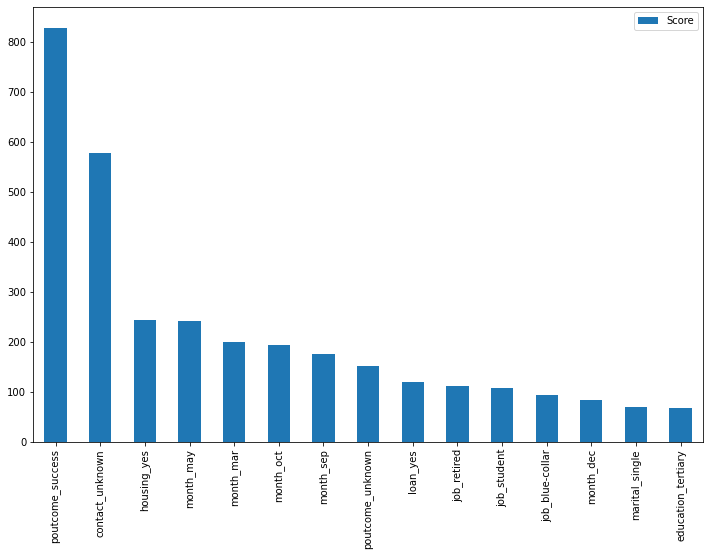

In [83]:
dfscores.nlargest(15 , 'Score').plot.bar(figsize = (12,8))

In [85]:
cat_top_15 = dfscores.sort_values(ascending = False, by = 'Score').head(15).index

### mutual information classifer test

In [86]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(scaled_df, y)
mutual_info

array([0.02821512, 0.04360934, 0.16014171])

In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = scaled_df.columns
mutual_info.sort_values(ascending = False)

duration    0.160142
balance     0.043609
age         0.028215
dtype: float64

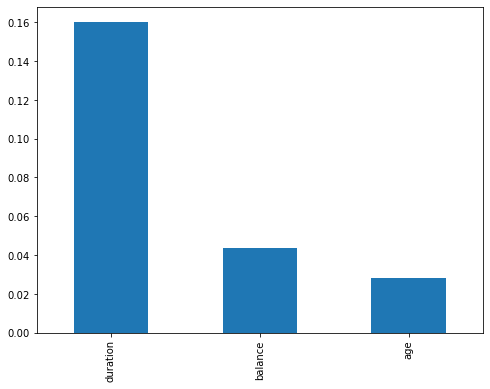

In [88]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (8,6))

### Concat into  a single dataframe

In [89]:
data = pd.concat([scaled_df , cat_df[cat_top_15] , df['deposit']] , axis = 1)

In [90]:
data.head()

,age,balance,duration,poutcome_success,contact_unknown,housing_yes,month_may,month_mar,month_oct,month_sep,poutcome_unknown,loan_yes,job_retired,job_student,job_blue-collar,month_dec,marital_single,education_tertiary,deposit
0,1.491505,0.252525,1.930226,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,yes
1,1.239676,-0.459974,3.154612,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,yes
2,-0.019470,-0.080160,2.929901,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,yes
3,1.155733,0.293762,0.596366,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,yes
4,1.071790,-0.416876,0.867171,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,yes


### Spliting the dataset into train and test

In [190]:
x = data.drop(['deposit'] , axis = 1)

In [191]:
y = data['deposit']

In [192]:
print(x.shape)
print(y.shape)

(11162, 18)
(11162,)


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 11)

In [115]:
print(len(x_train))
print(len(x_test))

7813
3349


## MODEL BUILDING

### LOGISTIC REGRESSION:

In [116]:
from sklearn import  metrics

from sklearn.metrics import classification_report ,  accuracy_score , confusion_matrix ,precision_score ,recall_score ,f1_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression

In [117]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [198]:
x_train_poly1 = poly_features_1.fit_transform(x_train)
x_train_poly2 = poly_features_2.fit_transform(x_train)
x_train_poly3 = poly_features_3.fit_transform(x_train)

In [199]:
### Logistic Regression with Polynomial Features of degree=1

In [200]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_poly1, y_train)
y_pred1 = logisticRegr.predict(poly_features_1.fit_transform(x_test))

acc1 = metrics.accuracy_score( y_test , y_pred1)
pre1 = metrics.precision_score(y_test , y_pred1 ,average = 'weighted')
rec1 = metrics.recall_score(y_test , y_pred1 ,average = 'weighted')
f1_1 = metrics.f1_score(y_test , y_pred1 ,average = 'weighted')

In [201]:
### Logistic Regression with Polynomial Features of degree=2

In [202]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_poly2, y_train)
y_pred2 = logisticRegr.predict(poly_features_2.fit_transform(x_test))
acc2 = metrics.accuracy_score( y_test , y_pred2 )
pre2 = metrics.precision_score(y_test , y_pred2 ,average = 'weighted')
rec2 = metrics.recall_score(y_test , y_pred2 ,average = 'weighted')
f1_2 = metrics.f1_score(y_test , y_pred2 ,average = 'weighted')

In [203]:
### Logistic Regression with Polynomial Features of degree=3

In [204]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_poly3, y_train)
y_pred3 = logisticRegr.predict(poly_features_3.fit_transform(x_test))
acc3 = metrics.accuracy_score( y_test , y_pred3)
pre3 = metrics.precision_score(y_test , y_pred3 ,average = 'weighted')
rec3 = metrics.recall_score(y_test , y_pred3  ,average = 'weighted')
f1_3 = metrics.f1_score(y_test , y_pred3  ,average = 'weighted')

In [ ]:
# Results

In [206]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.817557,0.828008,0.829501
1,Precision,0.818167,0.828091,0.830271
2,Recall,0.817557,0.828008,0.829501
3,F1 Score,0.817082,0.828039,0.829611


Text(0.5, 15.0, 'predicted label')

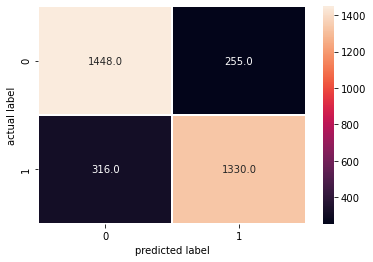

In [135]:
sns.heatmap(confusion_matrix(y_pred3,y_test) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [136]:
acc_score = cross_val_score(estimator = LogisticRegression() , X = x_train_poly3 ,y = y_train , cv = 5)

C:\Users\sathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [137]:
print(acc_score)
print(acc_score.mean())

[0.8240563  0.82661548 0.82021753 0.82522407 0.82330346]
0.8238833688456569


In [ ]:
### testing with train data accuracy

In [208]:
y_pred_train = logisticRegr.predict(x_train_poly3)
ac = metrics.accuracy_score( y_train , y_pred_train)
ac

0.8342506079610905

In [ ]:
### no overfitting

### RandomForestClassifier:

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [144]:
best_random_grid=rf_randomcv.best_estimator_

In [146]:
y_pred_rf=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rf)))
print("Classification report: {}".format(classification_report(y_test,y_pred_rf)))

[[1419  345]
 [ 225 1360]]
Accuracy Score 0.8297999402806808
Classification report:               precision    recall  f1-score   support

          no       0.86      0.80      0.83      1764
         yes       0.80      0.86      0.83      1585

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



Text(0.5, 15.0, 'predicted label')

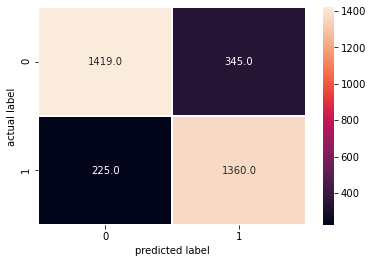

In [148]:
sns.heatmap(confusion_matrix(y_test , y_pred_rf) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [149]:
acc_score_rf = cross_val_score(estimator = RandomForestClassifier() , X = x_train ,y = y_train , cv = 5)

In [150]:
print(acc_score_rf)
print(acc_score_rf.mean())

[0.81509917 0.81765835 0.8106206  0.82522407 0.83098592]
0.8199176212395644


In [185]:
rf.fit(x_train , y_train)
rf.feature_importances_

array([0.13231861, 0.15371692, 0.4338837 , 0.05120302, 0.03883199,
       0.02954056, 0.01755954, 0.01669701, 0.01510519, 0.00948141,
       0.02954108, 0.0140252 , 0.0057022 , 0.00596363, 0.01158243,
       0.00286781, 0.01491001, 0.01706967])

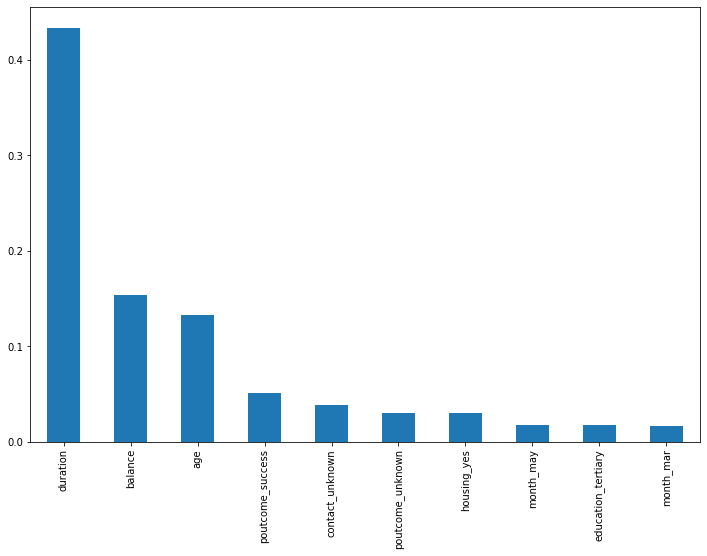

In [196]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores.nlargest(10).plot.bar(figsize = (12,8))

### SVC

In [153]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0)

In [154]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)


In [155]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8279797361242555


### XGBM:

In [156]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb.fit(x_train , y_train)

[17:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
y_pred_x = xgb.predict(x_test)

In [158]:
print(accuracy_score(y_pred_x , y_test))

0.838757838160645


Text(0.5, 15.0, 'predicted label')

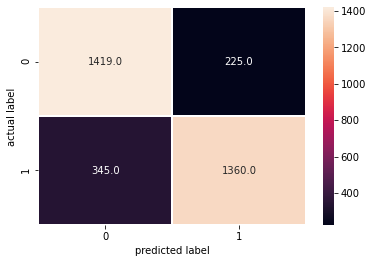

In [159]:
sns.heatmap(confusion_matrix(y_pred_rf,y_test ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [160]:
acc_score_rf = cross_val_score(estimator = XGBClassifier() , X = x_train ,y = y_train , cv = 5)

[17:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [161]:
print(acc_score_rf)
print(acc_score_rf.mean())

[0.81317978 0.82277671 0.8112604  0.83290653 0.82586428]
0.8211975394506279


### Conclusion:

In [ ]:
### logistic Regression with polynomial degree 3 given high accuracy of 82.3% when compared to all other algorithms